# Session 8: ODE stability; stiff system

Date: 11/06/2017, Monday

In [1]:
format compact

## ODE Stability

### Problem statement

Consider a simple ODE

$$
\frac{dy}{dt} = -a y, \ \ y(0)=y_0
$$

where $a$ is a **positive** real number.

It can be solved analytically:
$$
y(t) = y_0e^{-at}
$$

So the analytical solution decays exponentially. A numerical solution is allowed to have some error, but it should also be decaying. If the solution is instead growing, we say it is **unstable**.

### Explicit scheme

Forward Eulerian scheme for this problem is

$$
\frac{y_{k+1} - y_k}{h} = -ay_k
$$

The iteration is given by

$$
y_{k+1}= (1-ha)y_k
$$

The solution at the k-th time step can be written out explicitly
$$
y_k= (1-ha)^ky_0
$$

We all know that when $h$ gets smaller the numerical solution will converge to the true result. But here we are interested in relatively large $h$, i.e. we wonder **what's the largest possible** $h$ **we can use while still getting an OK result**.

Here are the solutions with different $h$.

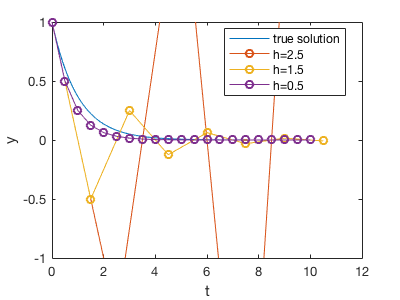

In [2]:
%plot -s 400,300

% set parameters, can use different value
a = 1; 
y0 = 1;
tspan = 10; 

% build function
f_true = @(t) y0*exp(-a*t); % true answer
f_forward = @(k,h) (1-h*a).^k * y0; % forward Euler solution

% plot true result
t_ar = linspace(0, tspan); % for plotting
y_true = f_true(t_ar);
plot(t_ar, y_true)
hold on

% plot Forward Euler solution
for h=[2.5, 1.5, 0.5] % try different step size
    kmax = round(tspan/h);
    k_ar = 0:kmax;
    t_ar = k_ar*h;
    
    % we are not doing Forward Euler iteration here
    % since the expression is known, we can directly
    % get the entire time series
    y_forward = f_forward(k_ar, h);
    
    plot(t_ar, y_forward, '-o')
end

% tweak details
ylim([-1,1]);
xlabel('t');ylabel('y');
legend('true solution', 'h=2.5', 'h=1.5', 'h=0.5' , 'Location', 'Best')

There all 3 typical regimes, determined by the magnitude of $[1-ha]$ inside the expression $y_k= (1-ha)^ky_0$.

1) **Small** $h$:  $0 \le [1-ha] < 1$

In this case, $(1-ha)^k$ will decay with $k$ and always be positve.

We can solve for the range of $h$:
$$
h \le 1/a
$$

This corresponds to h=0.5 in the above figure. 

2) **Medium** $h$:  $-1 \le [1-ha] < 0$

In this case, the absolute value of $(1-ha)^k$ will decay with $k$, but it oscillates between negative and postive. This is not desirable, but not that bad, as our solution doesn't blow up.

We can solve for the range of $h$:
$$
1/a < h \le 2/a
$$

This corresponds to h=1.5 in the above figure. 

3) **Large** $h$:  $[1-ha] < -1$

In this case, the absolute value of $(1-ha)^k$ will **increase** with $k$. That's the worst case because the true solution will be **decaying**, but our numerical solution insteads gives **exponential growth**. Here our numerical scheme is totally wrong, not just inaccurate.

We can solve for the range of $h$:
$$
h > 2/a
$$

This corresponds to h=2.5 in the above figure. 

The take-away is, **to obtain a stable solution, the time step size** $h$ **needs to be small enough. The time step requirement depends on** $a$, **i.e. how fast the system is changing.** If $a$ is large, the system is changing rapidly, and $h$ has to be small enough to capture this fast change.

### Implicit scheme

But sometimes we really want to use a large step size. For example, we might only care about the steady state where $t$ is very large, so we would like to quickly jump to the steady state with very few number of iterations. Implicit method allows us to use a large time step while still keep the solution stable.

Backward Eulerian scheme for this problem is

$$
\frac{y_{k+1} - y_k}{h} = -ay_{k+1}
$$

In general, the right hand-side would be some function $f(y_{k+1})$, and we need to solve a nonlinear equation to obtain $y_{k+1}$. This is why this method is called **implicit**. But in this problem here we happen to have a linear function, so we can still write out the iteration explicitly.

$$
y_{k+1}= \frac{y_k}{1+ha}
$$

The solution at the k-th time step can be written as
$$
y_k= \frac{y_0}{(1+ha)^k}
$$

Here are the solutions with different $h$.

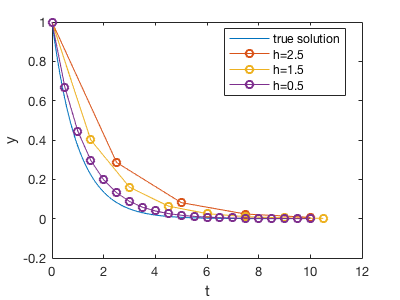

In [3]:
%plot -s 400,300

% set parameters, can use different value
a = 1; 
y0 = 1;
tspan = 10; 

% build function
f_true = @(t) y0*exp(-a*t); % true answer
f_backward = @(k,h) (1+h*a).^(-k) * y0; % backward Euler solution

% plot true result
t_ar = linspace(0, tspan); % for plotting
y_true = f_true(t_ar);
plot(t_ar, y_true)
hold on

% plot Forward Euler solution
for h=[2.5, 1.5, 0.5] % try different step size
    kmax = round(tspan/h);
    k_ar = 0:kmax;
    t_ar = k_ar*h;
    
    % we are not doing Forward Euler iteration here
    % since the expression is known, we can directly
    % get the entire time series
    y_backward = f_backward(k_ar, h);
    
    plot(t_ar, y_backward, '-o')
end

% tweak details
ylim([-0.2,1]);
xlabel('t');ylabel('y');
legend('true solution', 'h=2.5', 'h=1.5', 'h=0.5' , 'Location', 'Best')

Since $\frac{1}{1+ha}$ is always smaller than 1 for any positive $h$ and postive $a$, $y_k= \frac{y_k}{(1+ha)^k}$ will always decay. So we don't have the instability problem as in the explicit method. A large $h$ simply gives **inaccurate** results, but not **terribly wrong** results. 

According to [no free lunch theorm](https://en.wikipedia.org/wiki/No_free_lunch_theorem), implicit methods must have some additional costs (half joking. that's another theorm). The cost for an implicit method is solving a nonlinear system. In general we will have $f(y, t)$ on the right-hand side of the ODE, not simply $-ay$.

### General form

Using $-ay$ on the right-hand side allows a simple analysis, but the idea of ODE stability/instability applies to general ODEs. For example considering a system like

\begin{align}
\frac{dy}{dt} &= -f(t) y
\end{align}

You can use the typical magnitude of $f(t)$ as the "$a$" in the previous analysis.

Even for 
\begin{align}
\frac{dy}{dt} &= -f(t) y^2
\end{align}

You can consider the typical magnitude of $yf(t)$

## Stiff system

Consider an ODE system

\begin{align}
\frac{dy_1}{dt} &= -a_1y_1 \\
\frac{dy_2}{dt} &= -a_2y_2
\end{align}

Using an explicit method, the time step requirement for the first equation is $h<1/a_1$, while the requirement for the second one is $h<1/a_2$. If $a_1 >> a_2$, we have to use a quite small $h$ to accomodate the first requirement, but that's an overkill for the second equation. You will be using too many unnecessary time steps to solve $y_2$

We can define the **stiff ratio** $r=\frac{a_1}{a_2}$. A system is very stiff if $r$ is very large. With explicit methods you often need an unnecessarily large amount of time steps to ensure stability. Implicit methods are particularly useful for a stiff system because it has no instability problem.

You might want to solve two equations separately so we can use a larger time step for the second equation to save computing power. But it's not that easy because in real examples the two equations are often intertwined:

\begin{align}
\frac{dy_1}{dt} &= -a_1y_1  -a_3y_2 \\
\frac{dy_2}{dt} &= -a_2y_2  -a_4y_1
\end{align}